## Factorizacion de Matrices

Primero creemos una matriz de diseño inicial con valores aleatorios entre 0.1 y 0.9. Tambien creemos la funcion del error cuadratico medio

In [1]:
import numpy as np

class matrix_factorization():
    
    def __init__(self,data,features):
        self.data = data
        self.features = features
        self.user_count = data.shape[0]
        self.item_count = data.shape[1]
        self.user_features = np.random.uniform(low=0.1,high = 0.9, size = (self.user_count,self.features))
        self.item_features = np.random.uniform(low=0.1,high = 0.9, size = (self.features,self.item_count))
        
    def MSE(self):
        """
        Mean Squared Error function comparing dot product of user-feature row and feature-item column to user-item cell
        """
        
        matrix_product = np.matmul(self.user_features,self.item_features)
        return np.sum((self.data - matrix_product)**2)


    def single_gradient(self,user_row,item_col,wrt_user_idx = None, wrt_item_idx = None):
        """
        Calcula el gradiente de un unica celda usuario-item a una unica celda usuario-feature o item-feature
        """
        
        if wrt_user_idx !=None and wrt_item_idx !=None:
            return "Too many elements"
        elif wrt_user_idx ==None and wrt_item_idx ==None:
            return "insufficient elements"
        else:
            u_row = self.user_features[user_row,:]
            i_col = self.item_features[:,item_col]
            ui_rating = float(self.data[user_row,item_col])
            prediction = float(np.dot(u_row,i_col))
            
            if wrt_user_idx != None:
                row_elem = float(i_col[wrt_user_idx])
                gradient = 2*(ui_rating-prediction)*row_elem
            else:
                col_elem = float(u_row[wrt_item_idx])
                gradient = 2*(ui_rating-prediction)*col_elem
            return gradient
        
    def user_feature_gradient(self,user_row,wrt_user_idx):
        """
        Averages the gradients of a single user-item row with respect to a single user-feature parameter
        """
        
        summation = 0
        for col in range(0,self.item_count):
            summation += self.single_gradient(user_row = user_row,item_col=col,wrt_user_idx=wrt_user_idx)
        return summation/self.item_count
    
    def item_feature_gradient(self,item_col,wrt_item_idx):
        """
        Averages the gradients of a single user-item column with respect to a single feature-item parameter
        """
        
        summation = 0
        for row in range(0,self.user_count):
            summation += self.single_gradient(user_row = row,item_col=item_col,wrt_item_idx=wrt_item_idx)
        return summation/self.user_count
    
    def update_user_feature(self,learning_rate):
        """
        Updates every user-feature parameter according to supplied learning rate
        """
        for i in range(0, self.user_count):
            for j in range(0,self.features):
                self.user_features[i,j] += learning_rate*self.user_feature_gradient(user_row=i,wrt_user_idx=j)
        
    def update_item_feature(self,learning_rate):
        """
        Updates every feature-item parameter according to supplied learning rate
        """
        for i in range(0, self.features):
            for j in range(0,self.item_count):
                self.item_features[i,j] += learning_rate*self.item_feature_gradient(item_col=j,wrt_item_idx=i)

    ### Metodo de entrenamiento
    
    def train_model(self,learning_rate=0.1,iterations = 1000):
        """
        Trains model, outputting MSE cost/loss every 50 iterations, using supplied learning and iterations
        """
        for i in range(iterations):
            self.update_user_feature(learning_rate=learning_rate)
            self.update_item_feature(learning_rate=learning_rate)
            if i %50 ==0:
                print(self.MSE())
            

Este es un programa de cero, veamos que pasa si creamos matrices

In [2]:
d = np.array([[5,3,1],[1,3,5],[3,5,1]])
print(d)
d2 = matrix_factorization(d,2)
d2.train_model(learning_rate = .1)

[[5 3 1]
 [1 3 5]
 [3 5 1]]
55.04221425524983
3.538655308785251
3.5386552492239667
3.5386552492239662
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667
3.5386552492239667


In [3]:
np.dot(d2.user_features,d2.item_features)

array([[4.28078016, 3.86133275, 0.55412635],
       [0.8201476 , 3.21539   , 4.88850218],
       [3.84015545, 3.99383559, 1.52084655]])

Si consideramos un feature (caracteristica adicional), entonces nos mejora la descomposicion

In [4]:
d = np.array([[5,3,1],[1,3,5],[3,5,1]])
print(d)
d2 = matrix_factorization(d,3)
d2.train_model(learning_rate = .1)

[[5 3 1]
 [1 3 5]
 [3 5 1]]
37.0539353012441
5.24659669419074e-07
6.058344527289397e-20
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30
2.033782021272921e-30


In [5]:
np.dot(d2.user_features,d2.item_features)

array([[5., 3., 1.],
       [1., 3., 5.],
       [3., 5., 1.]])

In [6]:
### Ahora en Keras

from __future__ import print_function, division
from builtins import range, input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import tensorflow

from tensorflow import keras

In [7]:
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD

In [8]:
df = pd.read_csv('rating.csv')

In [9]:
df.head()

userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

In [10]:
user = df['userId'].value_counts().index
map = {k:i for i, k in enumerate(user)}
df['userId'] = df['userId'].map(map)

In [11]:
mov = df['movieId'].value_counts().index
map = {k:i for i, k in enumerate(mov)}
df['movieId'] = df['movieId'].map(map)

In [12]:
N = df['userId'].max()
M = df['movieId'].max()

df.drop('timestamp', axis = 1, inplace = True)

N,M



(270895, 45114)

In [13]:
n = 1000
m = 800

from collections import Counter

In [14]:
ucount = Counter(df['userId'])
mcount = Counter(df['movieId'])

uid = [u for u, c in ucount.most_common(n)]
mid = [u for u, c in mcount.most_common(m)]

In [15]:
newdf = df[df['userId'].isin(uid) & df['movieId'].isin(mid)]
newdf.head()

userId  movieId  rating
69308     122        9     4.5
69309     122      133     3.0
69310     122      344     3.5
69311     122      351     3.5
69312     122      118     3.5

In [16]:
N = newdf['userId'].max()
M = newdf['movieId'].max()

user = newdf['userId'].value_counts().index
map = {k:i for i, k in enumerate(user)}
newdf['userId'] = newdf['userId'].map(map)


C:\Users\pablo\AppData\Local\Temp\ipykernel_19188\1454887242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['userId'] = newdf['userId'].map(map)


In [17]:
mov = newdf['movieId'].value_counts().index
map = {k:i for i, k in enumerate(mov)}
newdf['movieId'] = newdf['movieId'].map(map)

C:\Users\pablo\AppData\Local\Temp\ipykernel_19188\1011386342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['movieId'] = newdf['movieId'].map(map)


In [18]:
newdf = shuffle(newdf)
cutoff = int(0.8*len(newdf))
cutoff

424663

In [19]:
train = newdf.iloc[: cutoff]
test = newdf.iloc[cutoff:]

In [20]:
K = 10
mu = newdf['rating'].mean()
epochs = 25
reg = 0.
N = 1000
M = 800

# KERAS

In [21]:
u = Input(shape=(1,))
m = Input(shape=(1,))

u_embed = Embedding(N, K, embeddings_regularizer = l2(reg))(u) # size (N,1,K)
m_embed = Embedding(M, K, embeddings_regularizer = l2(reg))(m) # size (M,1,K)

In [22]:
u_bias = Embedding(N, 1, embeddings_regularizer = l2(reg))(u)
m_bias = Embedding(M, 1, embeddings_regularizer = l2(reg))(m)

x = Dot(axes = 2)([u_embed, m_embed])

x = Add()([x, u_bias, m_bias])
x = Flatten()(x) # N,1

model = Model(inputs = (u, m),
             outputs = x)

model.compile(loss = 'mse',
             optimizer = Adam(learning_rate = 0.01),
             metrics = ['mse'])

In [23]:
r = model.fit(x = [train['userId'].values, train['movieId'].values],
                 y = train['rating'].values - mu,
                 epochs = epochs,
                 batch_size = 256,
                 validation_data = ([test['userId'].values, test['movieId'].values],
                 test['rating'].values - mu)
                 )

Epoch 1/25
1659/1659 [==============================] - 4s 2ms/step - loss: 0.6564 - mse: 0.6564 - val_loss: 0.5931 - val_mse: 0.5931
Epoch 2/25
1659/1659 [==============================] - 3s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.5768 - val_mse: 0.5768
Epoch 3/25
1659/1659 [==============================] - 3s 2ms/step - loss: 0.5631 - mse: 0.5631 - val_loss: 0.5732 - val_mse: 0.5732
Epoch 4/25
1659/1659 [==============================] - 3s 2ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.5720 - val_mse: 0.5720
Epoch 5/25
1659/1659 [==============================] - 3s 2ms/step - loss: 0.5592 - mse: 0.5592 - val_loss: 0.5668 - val_mse: 0.5668
Epoch 6/25
1659/1659 [==============================] - 3s 2ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.5685 - val_mse: 0.5685
Epoch 7/25
1659/1659 [==============================] - 3s 2ms/step - loss: 0.5579 - mse: 0.5579 - val_loss: 0.5678 - val_mse: 0.5678
Epoch 8/25
1659/1659 [==============================] - 3s 2ms

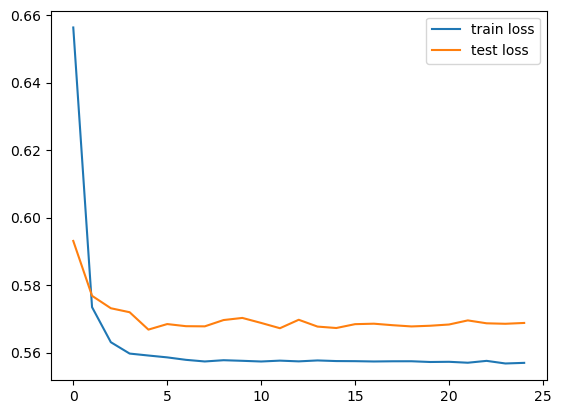

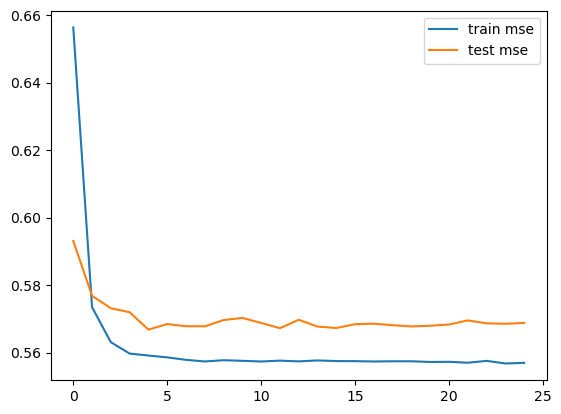

In [24]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()



## OTRO KERAS

In [25]:
from sklearn.datasets import dump_svmlight_file
import numpy as np
import pandas as pd
import os
import urllib
import zipfile
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
dataset = pd.read_csv('ml-100k/u.data',sep='\t',names="user_id,item_id,rating,timestamp".split(","))
dataset.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [27]:
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values

In [28]:
train, test = train_test_split(dataset, test_size=0.2)

In [29]:
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam

In [30]:
n_users, n_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
n_latent_factors = 20

In [31]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))
prod = keras.layers.dot([movie_vec, user_vec], axes=1,name='DotProduct')
model = keras.Model([user_input, movie_input], prod)

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [33]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Item (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 20)        33660       ['Item[0][0]']                   
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 20)        18880       ['User[0][0]']                   
                                                                                            

In [34]:
tf.keras.utils.plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [35]:
history = model.fit([train.user_id, train.item_id], train.rating, epochs=100, verbose=0)

Text(0, 0.5, 'Training Error')

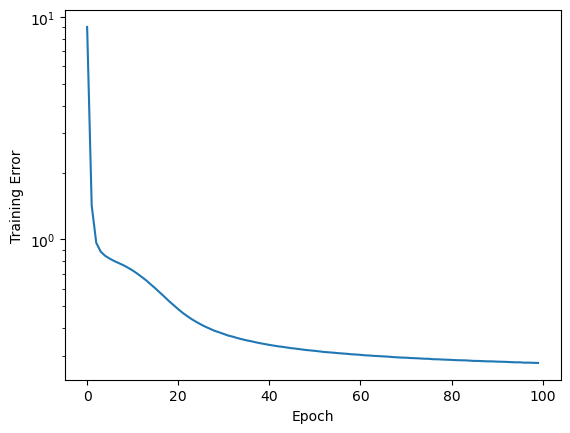

In [36]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Training Error")

In [37]:
results = model.evaluate((test.user_id, test.item_id), test.rating, batch_size=1)

20000/20000 [==============================] - 23s 1ms/step - loss: 1.6311 - mae: 0.9627 - mse: 1.6311


In [38]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]
pd.DataFrame(movie_embedding_learnt).describe()

0            1            2            3            4   \
count  1683.000000  1683.000000  1683.000000  1683.000000  1683.000000   
mean      0.405526    -0.245007    -0.339797     0.390812     0.362741   
std       0.447728     0.551896     0.454688     0.438931     0.459722   
min      -1.561249    -2.637166    -2.259719    -1.448762    -1.791313   
25%       0.127844    -0.571710    -0.590220     0.141861     0.102203   
50%       0.395095    -0.251809    -0.341558     0.369621     0.354133   
75%       0.656552     0.091125    -0.093239     0.626965     0.611066   
max       2.306833     2.643691     2.197722     2.250251     3.012209   

                5            6            7            8            9   \
count  1683.000000  1683.000000  1683.000000  1683.000000  1683.000000   
mean     -0.366627    -0.355951     0.362214    -0.395364    -0.014995   
std       0.460564     0.489104     0.439216     0.481854     0.590423   
min      -2.279373    -2.217624    -1.650012    -2.445029    -2.120675   
25%      -0.622530    -0.625964     0.111176    -0.651085    -0.431277   
50%      -0.369429    -0.364661     0.356184    -0.378415    -0.025529   
75%      -0.101558    -0.085793     0.605725    -0.125648     0.386055   
max       1.486250     1.705094     2.191681     1.538589     2.356173   

                10           11           12           13           14  \
count  1683.000000  1683.000000  1683.000000  1683.000000  1683.000000   
mean     -0.381773     0.351886     0.367441     0.361969     0.356099   
std       0.472524     0.467446     0.435138     0.455668     0.457277   
min      -2.234843    -1.959189    -1.592802    -1.517986    -1.388135   
25%      -0.628676     0.103786     0.123575     0.119834     0.093291   
50%      -0.362971     0.346852     0.348574     0.366956     0.355812   
75%      -0.119685     0.593291     0.600410     0.594888     0.630089   
max       1.683959     2.114439     2.196519     2.176318     2.322788   

                15           16           17           18           19  
count  1683.000000  1683.000000  1683.000000  1683.000000  1683.000000  
mean     -0.341872     0.370827    -0.346947     0.356693     0.321061  
std       0.497446     0.454495     0.474485     0.525763     0.495043  
min      -2.463854    -1.760366    -2.128938    -2.302337    -1.554339  
25%      -0.619196     0.139318    -0.616036     0.038827     0.030275  
50%      -0.349467     0.361404    -0.348749     0.341043     0.317502  
75%      -0.057607     0.606116    -0.093964     0.648126     0.599248  
max       1.754386     2.664126     2.118215     2.554424     2.200787

In [39]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]

In [40]:
def recommend(user_id, number_of_movies=5):
    movies = user_embedding_learnt[user_id]@movie_embedding_learnt.T
    mids = np.argpartition(movies, -number_of_movies)[-number_of_movies:]
    return mids

In [41]:
recommend(user_id=1)

array([ 600, 1511,  702,  129, 1130], dtype=int64)